In [8]:
%matplotlib inline
import gc
import sys
import csv
import numpy as np
import pandas as pd
from collections import OrderedDict

import mml_lib.visualization as viz

sys.path.append('/home/jovyan/work/yh09262/cython_home')
from get_csv_rows import get_csv_rows
#from get_csv_rows_v2 import get_csv_rows_v2

In [7]:
#from get_csv_rows_v2 import get_csv_rows_v2

In [2]:
!ls /home/jovyan/data/yh09262/prod

20190329_60  20190605_60  prod_attribute_July26_2019.csv


In [3]:
!ls /home/jovyan/data/yh09262/prod/20190329_60

Mar292019_attr_multi.csv		Mar292019_develop_purchase.csv
Mar292019_attrsave_c2c3.csv		Mar292019_develop_user_mapping.csv
Mar292019_develop_atb.csv		Mar292019_develop_view.csv
Mar292019_develop_productattribute.csv


In [10]:
#attr_file = '/home/jovyan/data/yh09262/prod/20190329_60/Mar292019_develop_productattribute.csv'
attr_file = '/home/jovyan/data/yh09262/prod/prod_attribute_July26_2019.csv'

In [25]:
attrrows = get_csv_rows(attr_file,numcols=24) # 24 in production version currently

In [26]:
attr = pd.DataFrame(attrrows[1:],columns=attrrows[0])
print(attr.shape)
attr.head(2)

(2285468, 24)


,product_id,prod_name,today_original_price,today_retail_price,availability_flag,home_category_id,gmm_id,div_id,department_id,prod_age_txt,...,age_category,prodtype,gender,master_product_flag,recommend_pdp,product_long_description,site_product_type,size_attr_name,actv_web_cat_ids,pwp_ind
0,75389,Marquis By Waterford Sheridan Bowls,NULL,NULL,N,56127,47,82,628,<null>,...,Adult,Home,<null>,Y,NULL,A series of vertical wedge cuts around the sid...,GIFTWARE,NULL,NULL,N
1,6850,"Lenox Serveware, 10"" Holiday Oval Vegetable Bowl",360.0,360.0,Y,53630,47,82,783,2918,...,<null>,Home,<null>,N,Y,What finer things can there be than this? Part...,CHINA,NULL,"8377,9545,24294,25037,25152,27226,29023,32175,...",N


In [27]:
attr['site_product_type'].value_counts()

ART                     493440
TOP                     223251
HAT                     113484
DRESS                   107212
AREA_RUG                 87585
SHOE                     62635
T-SHIRT                  58238
FURNITURE                54819
DECORATIVE_PILLOW        52889
PANTS                    45394
WATCH                    42764
EARRINGS                 41144
HANDBAG                  41069
SWEATER                  40126
NECKLACE                 36416
JACKET                   35475
OUTFIT                   34787
SHIRT                    30391
JEANS                    29537
ACCESSORIES              27773
SHORTS                   23104
BRACELET                 21743
SWIMSUIT                 21400
TOYS_AND_GAMES           19599
COAT                     17182
RING                     17152
LAMP                     14858
SHEET                    13472
BED_IN_A_BAG             12501
SKIRT                    12083
                         ...  
TIE_CLIPS                   63
LIMITED_

In [28]:
attr['master_product_flag'].value_counts()

N    2219799
Y      65669
Name: master_product_flag, dtype: int64

In [31]:
attr['prod_name'].value_counts()[:10]

DRAFT - DELETE                                       1121
DRAFT - Delete                                        718
DRAFT - delete                                        646
DRAFT - product for sanity DWMSM                      629
DRAFT - Lucky Brand Women's Emmie Ballet Flats        428
Designart Oversized Modern Round Metal Wall Clock     294
DRAFT - Delete/Archive                                286
DRAFT - delete me                                     246
DRAFT - DELETE / ARCHIVE                              238
DRAFT - Lucky Brand Women's Ava Skinny Jean           193
Name: prod_name, dtype: int64

In [37]:
attr['pwp_ind'].value_counts()

N    2284816
Y        652
Name: pwp_ind, dtype: int64

In [39]:
pwp = attr.query('pwp_ind == "Y"')
pwp.head()

,product_id,prod_name,today_original_price,today_retail_price,availability_flag,home_category_id,gmm_id,div_id,department_id,prod_age_txt,...,age_category,prodtype,gender,master_product_flag,recommend_pdp,product_long_description,site_product_type,size_attr_name,actv_web_cat_ids,pwp_ind
281,83812,Lenox Opal Innocence Dinner Plate,62.0,62.0,Y,53630,47,82,625,2918,...,<null>,Home,<null>,N,Y,Pure opulence. Posh opalescence. This classica...,CHINA,NULL,"8377,9545,16090,22878,24294,25037,27226,29023,...",Y
886,66145,Fiesta 12-oz. Lapis Java Mug,15.0,15.0,N,65938,47,82,688,<null>,...,<null>,<null>,<null>,N,NULL,An American classic with definitive Deco flair...,CASUAL_DINNERWARE,NULL,"9545,9741,11014,11792,12713,14089,16514,17924,...",Y
980,3052,Jockey Elance French Cut 3 Pack Underwear 1485...,22.5,22.5,Y,225,1,22,246,2918,...,Adult,Apparel,Women,N,Y,Comfort starts underneath. Treat yourself to t...,PANTY,WOMEN_PANTIES_SIZE_T,"225,3536,5943,15489,15576,17059,19867,20208,20...",Y
1453,5747,Fiesta Scarlet 4-Piece Place Setting,56.0,56.0,Y,53629,47,82,688,2918,...,<null>,<null>,<null>,N,Y,"For outstanding quality at the right price, lo...",CASUAL_DINNERWARE,NULL,"8020,9545,9547,9724,9741,11014,11591,11774,117...",Y
1515,83814,Lenox Opal Innocence Salad Plate,42.0,42.0,Y,53630,47,82,625,2918,...,<null>,Home,<null>,N,Y,Pure opulence. Posh opalescence. This classica...,CHINA,NULL,"8377,9545,24294,25037,27226,29023,32175,32738,...",Y


In [18]:
attr.columns

Index(['product_id', 'prod_name', 'today_original_price', 'today_retail_price',
       'availability_flag', 'home_category_id', 'gmm_id', 'div_id',
       'department_id', 'prod_age_txt', 'new_arrival', 'brand',
       'today_price_type_id', 'deal', 'age_category', 'prodtype', 'gender',
       'master_product_flag', 'recommend_pdp', 'product_long_description',
       'site_product_type', 'size_attr_name', 'actv_web_cat_ids', 'pwp_ind'],
      dtype='object')

In [18]:
%%time
#with open(path + 'ur_production_product_attr.csv', "r") as atfile:
with open(attr_file, "r") as atfile:
    csv_reader = csv.reader(atfile, delimiter="\t")
    ok_rows = []
    weird_rows = []
    rows24 = []
    wrow_idx = []
    for i, row in enumerate(csv_reader):
        if len(row) == 22:
            ok_rows.append(row)
        elif len(row) == 24:
            rows24.append(row)
        else:
            wrow_idx.append(i)
            weird_rows.append(row)

CPU times: user 19.6 s, sys: 4.55 s, total: 24.2 s
Wall time: 24.2 s


In [19]:
print("ok_rows: ",len(ok_rows)," rows24: ",len(rows24)," weird_rows: ",len(weird_rows))

ok_rows:  0  rows24:  1793611  weird_rows:  17


In [20]:
attr = pd.DataFrame(rows24[1:],columns=rows24[0])#, columns=cols)
print(attr.shape)
attr.head(2)

(1793610, 24)


,product_id,prod_name,today_original_price,today_retail_price,availability_flag,home_category_id,gmm_id,div_id,department_id,prod_age_txt,...,age_category,prodtype,gender,master_product_flag,recommend_pdp,product_long_description,site_product_type,size_attr_name,actv_web_cat_ids,pwp_ind
0,6,DRAFT - ETN W/CHALLIS BTM NO,NULL,NULL,N,18109,2,11,226,<null>,...,<null>,Apparel,<null>,N,NULL,NULL,DRESS,NULL,NULL,N
1,39,DRAFT - EuroPro Shark Super Garment Steamer,NULL,NULL,N,23487,47,85,693,<null>,...,<null>,Home,<null>,N,NULL,NULL,PERSONAL_CARE,NULL,NULL,N


In [21]:
attr['product_id'].nunique(), attr['prod_name'].nunique(), attr['prod_age_txt'].nunique()

(1793610, 1492674, 2596)

In [27]:
attr['prod_age_txt'].value_counts()[:20]

<null>    1394322
134         36630
176         18203
29           8897
161          8282
2799         5632
154          5338
119          5229
9            5161
28           4320
21           3768
70           3470
133          3345
19           3213
50           3107
61           3014
55           2918
146          2747
8            2662
30           2615
Name: prod_age_txt, dtype: int64

In [12]:
print(attr['brand'].nunique())
attr['brand'].value_counts()[:10]

4163


Macys                         243623
Trademark Global               80399
Nike                           54696
New Era                        54185
Lauren Ralph Lauren            33774
Metaverse                      31701
INC International Concepts     31044
Calvin Klein                   30841
Polo Ralph Lauren              26165
Tommy Hilfiger                 25332
Name: brand, dtype: int64

In [13]:
print(sorted(attr['brand'].unique()))

["'47 Brand", '1 Madison Expedition', '1.STATE', '10 Strawberry Street', '100 Good Deeds', '100% Pure', '108 Stitches', '143 Girl', '176 Clothing', '180s', '1888 Mills', '19 Cooper', '2(x)ist', '2-Kuhl', '2028', '212', '222 Fifth', '24th & Ocean', '28th & Park', '2Bamboo', '3 Bees and Me', '3 Sprouts', '3 Stories', '31 Bits', '32 Degrees', '3Doodler', '3R Studio', '3rd & Army', '4D CONCEPTS', '4D Cityscape', '4D Master', '4M', '4SI3NNA', '50 Cent', '510 Design', '525 America', '5th & Ocean', '6 Degrees', '7 For All Mankind', '7 Sisters', '8 Oak Lane', '82Zero', '88 Rue Du Rhone', 'A Gold E', 'A Pea in the Pod', 'A.B.S.', 'AB Home', 'ABASIX', 'ABBOTT', 'ABG Accessories', 'ABS by Allen Schwartz', 'ADORNIA', 'AFLighting', 'AG Hair', 'AG Jeans', 'AGB', 'AHS Lighting', 'ALDO', 'ALEX Toys', 'ALIQUANTUM INTERNATIONAL INC', 'AME', 'AMRAPUR OVERSEAS INC', 'AMY COE', 'AND1', 'ANK', 'AQ Textiles', 'AQUA2UDE', 'ARB Teak', 'ARG', 'ARTISTIX', 'ASD Living', 'ASTR the Label', 'ASWEETS', 'AVI-8', 'AVIG

In [14]:
attr.columns

Index(['product_id', 'prod_name', 'today_original_price', 'today_retail_price',
       'availability_flag', 'home_category_id', 'gmm_id', 'div_id',
       'department_id', 'prod_age_txt', 'new_arrival', 'brand',
       'today_price_type_id', 'deal', 'age_category', 'prodtype', 'gender',
       'master_product_flag', 'recommend_pdp', 'product_long_description',
       'site_product_type', 'size_attr_name', 'actv_web_cat_ids', 'pwp_ind'],
      dtype='object')

In [15]:
print(attr['prodtype'].nunique())
attr['prodtype'].value_counts()[:10]

49


Apparel                1032348
Home                    470783
Jewelry                 151150
Cosmetics                28214
<null>                   23155
Toys & Games             14932
Fragrance                 9939
Wallet                    9210
Cleaning/Organizing       6011
Luggage                   5847
Name: prodtype, dtype: int64

In [16]:
print(attr['site_product_type'].nunique())
attr['site_product_type'].value_counts()[:10]

212


TOP          220182
ART          195389
HAT          109268
DRESS        102032
AREA_RUG      56230
SHOE          55530
T-SHIRT       48502
FURNITURE     43437
PANTS         42266
WATCH         39932
Name: site_product_type, dtype: int64

In [17]:
attr['gender'].value_counts()

<null>    683268
Women     619834
Men       319204
Boys       81072
Girls      67098
Unisex     23134
Name: gender, dtype: int64

In [18]:
import matplotlib.pyplot as plt

In [19]:
# plt.figure(figsize=(10,10))
# plt.scatter(attr['home_category_id'].values,attr['department_id'].values)
# plt.show()

In [20]:
#np.corrcoef(attr['home_category_id'].values,attr['department_id'].values)

In [21]:
attr['size_attr_name'].nunique()

215

In [28]:
attr['size_attr_name'].value_counts()[:10]

NULL                                         1549955
WOMEN_REGULAR_SIZE_T                           40966
CAP_SIZE_T                                     35116
MEN_REGULAR_SIZE_T|MEN_BIG_TALL_SIZE_T         31746
BED_SIZE_T                                     12563
MEN_REGULAR_SIZE_T                             10191
MATERNITY_SIZE_REG_T                            9216
WOMEN_SHOE_SIZE_T|WOMEN_SHOE_WIDTH_SIZE_T       8828
WOMEN_PLUS_SIZE_T                               8205
MEN_SHOE_SIZE_T                                 6737
Name: size_attr_name, dtype: int64

In [29]:
null_size = attr.query('size_attr_name == "NULL"')
null_size.head(2)

,product_id,prod_name,today_original_price,today_retail_price,availability_flag,home_category_id,gmm_id,div_id,department_id,prod_age_txt,...,age_category,prodtype,gender,master_product_flag,recommend_pdp,product_long_description,site_product_type,size_attr_name,actv_web_cat_ids,pwp_ind
0,6,DRAFT - ETN W/CHALLIS BTM NO,NULL,NULL,N,18109,2,11,226,<null>,...,<null>,Apparel,<null>,N,NULL,NULL,DRESS,NULL,NULL,N
1,39,DRAFT - EuroPro Shark Super Garment Steamer,NULL,NULL,N,23487,47,85,693,<null>,...,<null>,Home,<null>,N,NULL,NULL,PERSONAL_CARE,NULL,NULL,N


In [30]:
null_size['product_id'].sample(n=10).values

array(['6350414', '7750958', '2238830', '818651', '1782757', '5255228',
       '8350005', '1170836', '1452284', '246470'], dtype=object)

In [31]:
#viz.display_recom_panel(['7403609', '1227525', '7377401', '7496251', '456302', '1967871','4820142', '2237733', '919133', '1624532'])

In [32]:
#attr.query('product_id == "4342097" or product_id == "6004406"')

In [33]:
attr['home_category_id'].nunique(), attr['department_id'].nunique()

(670, 772)

In [34]:
attr.columns

Index(['product_id', 'prod_name', 'today_original_price', 'today_retail_price',
       'availability_flag', 'home_category_id', 'gmm_id', 'div_id',
       'department_id', 'prod_age_txt', 'new_arrival', 'brand',
       'today_price_type_id', 'deal', 'age_category', 'prodtype', 'gender',
       'master_product_flag', 'recommend_pdp', 'product_long_description',
       'site_product_type', 'size_attr_name', 'actv_web_cat_ids', 'pwp_ind'],
      dtype='object')

In [35]:
attr['product_id'].nunique()

1793610

In [36]:
attr['gender'].nunique(), attr['deal'].nunique()

(6, 6)

### TODO
* Pick out which attributes to substitute in. So far I have:
    * brand (or brand + site_product_type pairs)
    * brand + deal pairs
    * site_product_type
    * home_category_id
    * department_id
    * dimensionality-reduced cluster ids?
    * prod_age_txt == too many null values
* Train each model separately

In [37]:
attr.columns

Index(['product_id', 'prod_name', 'today_original_price', 'today_retail_price',
       'availability_flag', 'home_category_id', 'gmm_id', 'div_id',
       'department_id', 'prod_age_txt', 'new_arrival', 'brand',
       'today_price_type_id', 'deal', 'age_category', 'prodtype', 'gender',
       'master_product_flag', 'recommend_pdp', 'product_long_description',
       'site_product_type', 'size_attr_name', 'actv_web_cat_ids', 'pwp_ind'],
      dtype='object')

In [38]:
attr['brand'].nunique(), attr['site_product_type'].nunique()

(4163, 212)

In [39]:
attr['prod_age_txt'].value_counts()[:2]

<null>    1394322
134         36630
Name: prod_age_txt, dtype: int64

In [40]:
attr['new_arrival'].value_counts()

NULL    1772772
new       20838
Name: new_arrival, dtype: int64

In [41]:
attr['actv_web_cat_ids'].nunique(), attr['pwp_ind'].nunique(), attr['deal'].nunique()

(199035, 2, 6)

In [42]:
attr['actv_web_cat_ids'].values[:3]

array(['NULL', 'NULL',
       '30076,30088,31746,32738,32963,34899,48192,51576,54698,66190,68371,70054,70978,71749,72640,73821,75517,75970,75974,76000,77138,77184,77471,77517,77804,77850,77951,79241,79245,87642,120059,127242,127244,169742,172846,172847,172849,172851,183582'],
      dtype=object)

In [43]:
attr['deal'].value_counts()

regular            1129898
regular price       241779
markdown            157599
specials            154615
sale                 99009
advertised sale      10710
Name: deal, dtype: int64

In [44]:
attr['age_category'].value_counts()[:10]

Adult                 824826
<null>                690342
Adult, Teen           111520
Child                  86811
Child, Toddler         35031
Infant                 28730
Toddler                 5435
Teen                    2355
Adult, Child            1703
Adult, Child, Teen      1451
Name: age_category, dtype: int64

In [79]:
attr['today_price_type_id'].value_counts()[:5]

NULL    1129898
0        189682
24       153566
7        103438
3         79317
Name: today_price_type_id, dtype: int64

In [48]:
#attr['size_attr_name'].value_counts()

In [ ]:
#viz.display_recom_panel(attr.query('age_category == "Adult"').sample(n=8)['product_id'].values)

In [ ]:
#viz.display_recom_panel(attr.query('age_category == "Adult, Teen"').sample(n=8)['product_id'].values)

In [ ]:
#viz.display_recom_panel(attr.query('age_category == "<null>"').sample(n=8)['product_id'].values)

In [45]:
# mostly null
attr['today_retail_price'].nunique(), attr['today_price_type_id'].nunique()

(8949, 21)

In [ ]:
import itertools

In [ ]:
#%%time
#brand_siteprod = list(itertools.product(attr['brand'].values, attr['site_product_type'].values))

### Create Combined Columns

In [46]:
attr.columns

Index(['product_id', 'prod_name', 'today_original_price', 'today_retail_price',
       'availability_flag', 'home_category_id', 'gmm_id', 'div_id',
       'department_id', 'prod_age_txt', 'new_arrival', 'brand',
       'today_price_type_id', 'deal', 'age_category', 'prodtype', 'gender',
       'master_product_flag', 'recommend_pdp', 'product_long_description',
       'site_product_type', 'size_attr_name', 'actv_web_cat_ids', 'pwp_ind'],
      dtype='object')

In [72]:
maybe_use_later = ['prod_name', 'today_original_price', 'today_retail_price',
                   'availability_flag','prod_age_txt', 'new_arrival','today_price_type_id',
                   'master_product_flag', 'recommend_pdp', 'product_long_description',
                  'actv_web_cat_ids', 'pwp_ind']

others = ['prodtype']

to_permute = [ 'home_category_id', 'gmm_id', 'div_id','department_id', 'brand','deal', 
              'age_category', 'gender','site_product_type', 'size_attr_name',]

to_permute34 = [ 'home_category_id', 'brand','deal', 'age_category', 'gender','site_product_type']

In [65]:
from itertools import combinations

In [66]:
comb2 = list(combinations(to_permute,2))
print(comb2[:10])

[('home_category_id', 'gmm_id'), ('home_category_id', 'div_id'), ('home_category_id', 'department_id'), ('home_category_id', 'brand'), ('home_category_id', 'deal'), ('home_category_id', 'age_category'), ('home_category_id', 'gender'), ('home_category_id', 'site_product_type'), ('home_category_id', 'size_attr_name'), ('gmm_id', 'div_id')]


In [73]:
comb3 = list(combinations(to_permute34,3))
print(comb3[:10])

[('home_category_id', 'brand', 'deal'), ('home_category_id', 'brand', 'age_category'), ('home_category_id', 'brand', 'gender'), ('home_category_id', 'brand', 'site_product_type'), ('home_category_id', 'deal', 'age_category'), ('home_category_id', 'deal', 'gender'), ('home_category_id', 'deal', 'site_product_type'), ('home_category_id', 'age_category', 'gender'), ('home_category_id', 'age_category', 'site_product_type'), ('home_category_id', 'gender', 'site_product_type')]


In [74]:
comb4 = list(combinations(to_permute34,4))
print(comb4[:10])

[('home_category_id', 'brand', 'deal', 'age_category'), ('home_category_id', 'brand', 'deal', 'gender'), ('home_category_id', 'brand', 'deal', 'site_product_type'), ('home_category_id', 'brand', 'age_category', 'gender'), ('home_category_id', 'brand', 'age_category', 'site_product_type'), ('home_category_id', 'brand', 'gender', 'site_product_type'), ('home_category_id', 'deal', 'age_category', 'gender'), ('home_category_id', 'deal', 'age_category', 'site_product_type'), ('home_category_id', 'deal', 'gender', 'site_product_type'), ('home_category_id', 'age_category', 'gender', 'site_product_type')]


### Pick the ones that seem like they'd be the most interesting / informative

In [75]:
print(comb3)

[('home_category_id', 'brand', 'deal'), ('home_category_id', 'brand', 'age_category'), ('home_category_id', 'brand', 'gender'), ('home_category_id', 'brand', 'site_product_type'), ('home_category_id', 'deal', 'age_category'), ('home_category_id', 'deal', 'gender'), ('home_category_id', 'deal', 'site_product_type'), ('home_category_id', 'age_category', 'gender'), ('home_category_id', 'age_category', 'site_product_type'), ('home_category_id', 'gender', 'site_product_type'), ('brand', 'deal', 'age_category'), ('brand', 'deal', 'gender'), ('brand', 'deal', 'site_product_type'), ('brand', 'age_category', 'gender'), ('brand', 'age_category', 'site_product_type'), ('brand', 'gender', 'site_product_type'), ('deal', 'age_category', 'gender'), ('deal', 'age_category', 'site_product_type'), ('deal', 'gender', 'site_product_type'), ('age_category', 'gender', 'site_product_type')]


In [70]:
cool2 = [('home_category_id', 'brand'), ('home_category_id', 'deal'), ('home_category_id', 'age_category'), 
         ('home_category_id', 'gender'), ('gmm_id', 'brand'), ('gmm_id', 'deal'), ('gmm_id', 'age_category'), 
         ('gmm_id', 'gender'), ('gmm_id', 'size_attr_name'), ('div_id', 'brand'), ('div_id', 'deal'), 
         ('div_id', 'age_category'), ('div_id', 'gender'), ('div_id', 'site_product_type'), 
         ('department_id', 'brand'), ('department_id', 'deal'), ('department_id', 'age_category'), 
         ('department_id', 'gender'), ('department_id', 'site_product_type'), ('brand', 'deal'), 
         ('brand', 'age_category'), ('brand', 'gender'), ('brand', 'site_product_type'), 
         ('brand', 'size_attr_name'), ('deal', 'age_category'), ('deal', 'gender'), ('deal', 'site_product_type'), 
         ('deal', 'size_attr_name'), ('age_category', 'gender'), ('age_category', 'site_product_type'), 
         ('gender', 'site_product_type'), ('gender', 'size_attr_name'), ('site_product_type', 'size_attr_name')]

c2 =     [('home_category_id', 'brand'), ('home_category_id', 'deal'), ('brand', 'deal'), 
         ('brand', 'age_category'), ('brand', 'gender'), ('deal', 'age_category'), ('deal', 'gender'), 
          ('deal', 'site_product_type'), ('deal', 'size_attr_name'), ('age_category', 'site_product_type')]

In [76]:
c3 = [('home_category_id', 'brand', 'deal'), 
      ('home_category_id', 'brand', 'age_category'), 
      ('home_category_id', 'brand', 'gender'), 
      ('home_category_id', 'brand', 'site_product_type'), 
      ('home_category_id', 'deal', 'age_category'), 
      ('home_category_id', 'deal', 'gender'), 
      ('home_category_id', 'deal', 'site_product_type'), 
      ('home_category_id', 'age_category', 'site_product_type'), 
      ('home_category_id', 'gender', 'site_product_type'), 
      ('brand', 'deal', 'age_category'), 
      ('brand', 'deal', 'gender'), 
      ('brand', 'deal', 'site_product_type'), 
      ('brand', 'age_category', 'gender'), 
      ('brand', 'age_category', 'site_product_type'), 
      ('brand', 'gender', 'site_product_type'), 
      ('deal', 'age_category', 'gender'), 
      ('deal', 'age_category', 'site_product_type'), 
      ('deal', 'gender', 'site_product_type'), 
      ('age_category', 'gender', 'site_product_type')]

### Now creating new columns

In [119]:
attr.columns

Index(['product_id', 'prod_name', 'today_original_price', 'today_retail_price',
       'availability_flag', 'home_category_id', 'gmm_id', 'div_id',
       'department_id', 'prod_age_txt', 'new_arrival', 'brand',
       'today_price_type_id', 'deal', 'age_category', 'prodtype', 'gender',
       'master_product_flag', 'recommend_pdp', 'product_long_description',
       'site_product_type', 'size_attr_name', 'actv_web_cat_ids', 'pwp_ind'],
      dtype='object')

In [120]:
attrsave = attr[['product_id', 'prod_name', 'home_category_id', 'gmm_id', 'div_id', 
                 'department_id', 'brand', 'deal', 'age_category', 'gender',
                 'product_long_description', 'site_product_type', 'size_attr_name']]
gc.collect()

130

In [121]:
attrsave.shape

(1793610, 13)

In [122]:
"___".join(map(str,c2[0]))

'home_category_id___brand'

In [113]:
tuple([x for x in range(10)])

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9)

In [114]:
#list(zip(*[attrsave['home_category_id'],attrsave['brand']]))

In [123]:
for tup in c2:
    print(tup)
    print("joined: ","___".join(map(str,tup)))
    attrsave["___".join(map(str,tup))] = list(zip(*[attrsave[x] for x in tup]))
    
for tup in c3:
    print(tup)
    print("joined: ","___".join(map(str,tup)))
    attrsave["___".join(map(str,tup))] = list(zip(*[attrsave[x] for x in tup]))

('home_category_id', 'brand')
joined:  home_category_id___brand


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


('home_category_id', 'deal')
joined:  home_category_id___deal
('brand', 'deal')
joined:  brand___deal
('brand', 'age_category')
joined:  brand___age_category
('brand', 'gender')
joined:  brand___gender
('deal', 'age_category')
joined:  deal___age_category
('deal', 'gender')
joined:  deal___gender
('deal', 'site_product_type')
joined:  deal___site_product_type
('deal', 'size_attr_name')
joined:  deal___size_attr_name
('age_category', 'site_product_type')
joined:  age_category___site_product_type
('home_category_id', 'brand', 'deal')
joined:  home_category_id___brand___deal
('home_category_id', 'brand', 'age_category')
joined:  home_category_id___brand___age_category
('home_category_id', 'brand', 'gender')
joined:  home_category_id___brand___gender
('home_category_id', 'brand', 'site_product_type')
joined:  home_category_id___brand___site_product_type
('home_category_id', 'deal', 'age_category')
joined:  home_category_id___deal___age_category
('home_category_id', 'deal', 'gender')
joined

In [132]:
attrsave.columns

Index(['product_id', 'prod_name', 'home_category_id', 'gmm_id', 'div_id',
       'department_id', 'brand', 'deal', 'age_category', 'gender',
       'product_long_description', 'site_product_type', 'size_attr_name',
       'home_category_id___brand', 'home_category_id___deal', 'brand___deal',
       'brand___age_category', 'brand___gender', 'deal___age_category',
       'deal___gender', 'deal___site_product_type', 'deal___size_attr_name',
       'age_category___site_product_type', 'home_category_id___brand___deal',
       'home_category_id___brand___age_category',
       'home_category_id___brand___gender',
       'home_category_id___brand___site_product_type',
       'home_category_id___deal___age_category',
       'home_category_id___deal___gender',
       'home_category_id___deal___site_product_type',
       'home_category_id___age_category___site_product_type',
       'home_category_id___gender___site_product_type',
       'brand___deal___age_category', 'brand___deal___gender',
    

In [125]:
print(attrsave.shape)
attrsave.head(3)

(1793610, 42)


,product_id,prod_name,home_category_id,gmm_id,div_id,department_id,brand,deal,age_category,gender,...,brand___deal___age_category,brand___deal___gender,brand___deal___site_product_type,brand___age_category___gender,brand___age_category___site_product_type,brand___gender___site_product_type,deal___age_category___gender,deal___age_category___site_product_type,deal___gender___site_product_type,age_category___gender___site_product_type
0,6,DRAFT - ETN W/CHALLIS BTM NO,18109,2,11,226,Macys,regular,<null>,<null>,...,"(Macys, regular, <null>)","(Macys, regular, <null>)","(Macys, regular, DRESS)","(Macys, <null>, <null>)","(Macys, <null>, DRESS)","(Macys, <null>, DRESS)","(regular, <null>, <null>)","(regular, <null>, DRESS)","(regular, <null>, DRESS)","(<null>, <null>, DRESS)"
1,39,DRAFT - EuroPro Shark Super Garment Steamer,23487,47,85,693,Macys,regular,<null>,<null>,...,"(Macys, regular, <null>)","(Macys, regular, <null>)","(Macys, regular, PERSONAL_CARE)","(Macys, <null>, <null>)","(Macys, <null>, PERSONAL_CARE)","(Macys, <null>, PERSONAL_CARE)","(regular, <null>, <null>)","(regular, <null>, PERSONAL_CARE)","(regular, <null>, PERSONAL_CARE)","(<null>, <null>, PERSONAL_CARE)"
2,45,"Ralph Lauren Men's Polo Eau de Toilette Spray,...",30088,4,38,349,Ralph Lauren,regular price,Adult,Men,...,"(Ralph Lauren, regular price, Adult)","(Ralph Lauren, regular price, Men)","(Ralph Lauren, regular price, FRAGRANCE)","(Ralph Lauren, Adult, Men)","(Ralph Lauren, Adult, FRAGRANCE)","(Ralph Lauren, Men, FRAGRANCE)","(regular price, Adult, Men)","(regular price, Adult, FRAGRANCE)","(regular price, Men, FRAGRANCE)","(Adult, Men, FRAGRANCE)"


In [128]:
for col in attrsave.columns:
    print("{}:".format(col))
    print(attrsave[col].value_counts()[:5])
    print()

product_id:
7635945    1
2832391    1
1294347    1
2278947    1
486318     1
Name: product_id, dtype: int64

prod_name:
DRAFT - DELETE                                    1115
DRAFT - Delete                                     705
DRAFT - product for sanity DWMSM                   629
DRAFT - delete                                     620
DRAFT - Lucky Brand Women's Emmie Ballet Flats     429
Name: prod_name, dtype: int64

home_category_id:
65701     195985
55979      93309
55285      76807
190362     70640
22672      66485
Name: home_category_id, dtype: int64

gmm_id:
47    476983
2     340334
91    328329
5     310678
1     288909
Name: gmm_id, dtype: int64

div_id:
67    323985
82    262406
81    100450
6      79432
79     60256
Name: div_id, dtype: int64

department_id:
912    220888
699    220035
911     54979
868     25228
61      20440
Name: department_id, dtype: int64

brand:
Macys                  243623
Trademark Global        80399
Nike                    54696
New Era       

(55979, <null>, ART)         93159
(65701, Men, HAT)            83998
(190362, <null>, ART)        70639
(255, Women, TOP)            58264
(16905, <null>, AREA_RUG)    55139
Name: home_category_id___gender___site_product_type, dtype: int64

brand___deal___age_category:
(Macys, regular, <null>)                 243279
(Trademark Global, specials, <null>)      72249
(New Era, regular, Adult)                 29411
(Lauren Ralph Lauren, regular, Adult)     25962
(Metaverse, specials, <null>)             24956
Name: brand___deal___age_category, dtype: int64

brand___deal___gender:
(Macys, regular, <null>)                 243268
(Trademark Global, specials, <null>)      72505
(New Era, regular, Men)                   28095
(Lauren Ralph Lauren, regular, Women)     25150
(Metaverse, specials, <null>)             24956
Name: brand___deal___gender, dtype: int64

brand___deal___site_product_type:
(Trademark Global, specials, ART)      72154
(Macys, regular, ART)                  56811
(New Era, 

In [129]:
%%time
attrsave.to_csv('/home/jovyan/data/yh09262/prod/20190329_60/Mar292019_attrsave_c2c3.csv')

CPU times: user 1min 30s, sys: 3.58 s, total: 1min 34s
Wall time: 1min 36s


In [130]:
!ls /home/jovyan/data/yh09262/prod/20190329_60/*.csv

/home/jovyan/data/yh09262/prod/20190329_60/Mar292019_attr_multi.csv
/home/jovyan/data/yh09262/prod/20190329_60/Mar292019_attrsave_c2c3.csv
/home/jovyan/data/yh09262/prod/20190329_60/Mar292019_develop_atb.csv
/home/jovyan/data/yh09262/prod/20190329_60/Mar292019_develop_productattribute.csv
/home/jovyan/data/yh09262/prod/20190329_60/Mar292019_develop_purchase.csv
/home/jovyan/data/yh09262/prod/20190329_60/Mar292019_develop_user_mapping.csv
/home/jovyan/data/yh09262/prod/20190329_60/Mar292019_develop_view.csv


### NOW LETS DO THE WORD |VECTOR CREATION AND DIMENSIONALITY REDUCTION

In [34]:
attr = pd.read_csv('/home/jovyan/data/yh09262/prod/20190329_60/Mar292019_attr_multi.csv')
print(attr.shape)
print(attr.columns)
attr.head()

(1793610, 24)
Index(['Unnamed: 0', 'product_id', 'prod_name', 'home_category_id', 'gmm_id',
       'div_id', 'department_id', 'brand', 'deal', 'age_category', 'prodtype',
       'gender', 'product_long_description', 'site_product_type',
       'size_attr_name', 'brand_siteprod', 'brand_deal', 'deal_siteprod',
       'gender_deal', 'age_deal', 'age_brand', 'age_siteprod',
       'brand_deal_siteprod', 'age_deal_siteprod'],
      dtype='object')


,Unnamed: 0,product_id,prod_name,home_category_id,gmm_id,div_id,department_id,brand,deal,age_category,...,size_attr_name,brand_siteprod,brand_deal,deal_siteprod,gender_deal,age_deal,age_brand,age_siteprod,brand_deal_siteprod,age_deal_siteprod
0,0,6,DRAFT - ETN W/CHALLIS BTM NO,18109.0,2,11,226,Macys,regular,<null>,...,NaN,"('Macys', 'DRESS')","('Macys', 'regular')","('DRESS', 'regular')","('<null>', 'regular')","('<null>', 'regular')","('<null>', 'Macys')","('<null>', 'DRESS')","('Macys', 'regular', 'DRESS')","('<null>', 'regular', 'DRESS')"
1,1,39,DRAFT - EuroPro Shark Super Garment Steamer,23487.0,47,85,693,Macys,regular,<null>,...,NaN,"('Macys', 'PERSONAL_CARE')","('Macys', 'regular')","('PERSONAL_CARE', 'regular')","('<null>', 'regular')","('<null>', 'regular')","('<null>', 'Macys')","('<null>', 'PERSONAL_CARE')","('Macys', 'regular', 'PERSONAL_CARE')","('<null>', 'regular', 'PERSONAL_CARE')"
2,2,45,"Ralph Lauren Men's Polo Eau de Toilette Spray,...",30088.0,4,38,349,Ralph Lauren,regular price,Adult,...,NaN,"('Ralph Lauren', 'FRAGRANCE')","('Ralph Lauren', 'regular price')","('FRAGRANCE', 'regular price')","('Men', 'regular price')","('Adult', 'regular price')","('Adult', 'Ralph Lauren')","('Adult', 'FRAGRANCE')","('Ralph Lauren', 'regular price', 'FRAGRANCE')","('Adult', 'regular price', 'FRAGRANCE')"
3,3,113,Elizabeth Arden Visible Difference Refining Mo...,30078.0,4,37,359,Elizabeth Arden,regular price,Adult,...,NaN,"('Elizabeth Arden', 'SKIN_CARE')","('Elizabeth Arden', 'regular price')","('SKIN_CARE', 'regular price')","('Women', 'regular price')","('Adult', 'regular price')","('Adult', 'Elizabeth Arden')","('Adult', 'SKIN_CARE')","('Elizabeth Arden', 'regular price', 'SKIN_CARE')","('Adult', 'regular price', 'SKIN_CARE')"
4,4,117,"Elizabeth Arden Lip-Fix Cream, 0.5 fl. oz.",30077.0,4,37,359,Elizabeth Arden,regular,Adult,...,NaN,"('Elizabeth Arden', 'LIP_MAKEUP')","('Elizabeth Arden', 'regular')","('LIP_MAKEUP', 'regular')","('Women', 'regular')","('Adult', 'regular')","('Adult', 'Elizabeth Arden')","('Adult', 'LIP_MAKEUP')","('Elizabeth Arden', 'regular', 'LIP_MAKEUP')","('Adult', 'regular', 'LIP_MAKEUP')"


### Create Word Vectors

In [35]:
#!pip install spacy
#!python -m spacy download en_core_web_md

In [36]:
import spacy
nlp = spacy.load('en_core_web_md')

In [37]:
attr.columns

Index(['Unnamed: 0', 'product_id', 'prod_name', 'home_category_id', 'gmm_id',
       'div_id', 'department_id', 'brand', 'deal', 'age_category', 'prodtype',
       'gender', 'product_long_description', 'site_product_type',
       'size_attr_name', 'brand_siteprod', 'brand_deal', 'deal_siteprod',
       'gender_deal', 'age_deal', 'age_brand', 'age_siteprod',
       'brand_deal_siteprod', 'age_deal_siteprod'],
      dtype='object')

### TODO: More sophisticated regex rules

In [144]:
%%time
pat1 = '[A-Za-z]\.[A-Za-z]' #\.[A-Za-z]'

attr['s_merge'] = attr.loc[:,'site_product_type'] + " " + attr.loc[:,'prod_name'].astype(str)
attr['l_merge'] = attr.loc[:,'site_product_type'] + " " + attr.loc[:,'prod_name'].astype(str) + " " + attr.loc[:,'product_long_description'] + " " + attr.loc[:,'site_product_type'] + " " + attr.loc[:,'prod_name'].astype(str)
attr['s_merge'] = attr['s_merge'].str.replace(r"{}".format(pat1),' ').values
attr['l_merge'] = attr['l_merge'].str.replace(r"{}".format(pat1),' ').values

CPU times: user 24.3 s, sys: 1.73 s, total: 26 s
Wall time: 26 s


In [145]:
attr.loc[0,'product_long_description']

nan

In [146]:
attr.loc[0,'s_merge']

'DRESS DRAFT - ETN W/CHALLIS BTM NO'

#### Need to think about how we will handle the nan values - before or after vectorizing?

In [147]:
attr.loc[0,'l_merge']

nan

In [148]:
attr.loc[10,'s_merge']

'BODY_CARE Calvin Klein ck one Deodorant, 2.6 oz'

In [149]:
attr.loc[10,'prod_name']

'Calvin Klein ck one Deodorant, 2.6 oz'

In [150]:
attr.loc[10,'product_long_description']

"One of the world's leading lifestyle brands, Calvin Klein is synonymous with authentic modern minimalist style. Everything it creates -clothing, accessories, home design-becomes a timeless classic. The label's award-winning fragrances are no exception. Calvin Klein's portfolio of bold and iconic scents continues to redefine the world of perfume.This lightly scented ck one deodorant stick will keep you fresh and dry all day.¿ Cool. Clean. Refreshing. ck one is a free-spirited, youthful fragrance that inspires you to be yourself. Designed for men and women to share, it belongs to everyone.The universally appealing fragrance, balancing brightness and sensuality, is for use any time of the day or night.A green tea accord travels through the scent, contributing to the signature identity of ck one. The fragrance begins with bright notes of mandarin orange, papaya, bergamot, and lemon. The heart comes to life with an aromatic harmony of nutmeg, violet, jasmine, lily-of-the-valley and rose. T

In [151]:
attr.loc[10,'l_merge']

"BODY_CARE Calvin Klein ck one Deodorant, 2.6 oz One of the world's leading lifestyle brands, Calvin Klein is synonymous with authentic modern minimalist style. Everything it creates -clothing, accessories, home design-becomes a timeless classic. The label's award-winning fragrances are no exception. Calvin Klein's portfolio of bold and iconic scents continues to redefine the world of perfum his lightly scented ck one deodorant stick will keep you fresh and dry all day.¿ Cool. Clean. Refreshing. ck one is a free-spirited, youthful fragrance that inspires you to be yourself. Designed for men and women to share, it belongs to everyon he universally appealing fragrance, balancing brightness and sensuality, is for use any time of the day or nigh  green tea accord travels through the scent, contributing to the signature identity of ck one. The fragrance begins with bright notes of mandarin orange, papaya, bergamot, and lemon. The heart comes to life with an aromatic harmony of nutmeg, viole

### Data Preparation

In [43]:
N_DATA = 120000 #textdf.shape[0] #600000

# data = np.matrix([np.array(x,dtype='float64') for x in textdf['vectors2']])[:N_DATA]
# data = np.array(data,dtype='float64')
#data=newvecs[:N_DATA]
data = textdf['vectors3']
print(data.shape)

(1853513,)


In [49]:
data[1].shape

(300,)

In [48]:
data[1][:5]

array([ 0.12184899,  0.08809177, -0.11497238, -0.08713301, -0.03187023])

In [51]:
data = np.stack(data, axis=0)

In [52]:
data.shape

(1853513, 300)

### Dimensionality Reduction

In [58]:
from sklearn.decomposition import PCA
COMPONENTS = 30
pca = PCA(n_components=COMPONENTS)
pca_result = pca.fit_transform(data)

In [59]:
import matplotlib.pyplot as plt

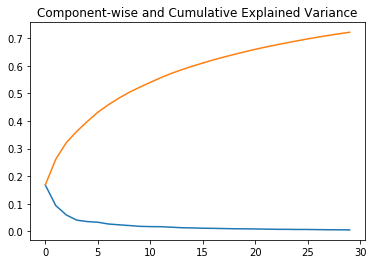

In [60]:
plt.plot(range(COMPONENTS), pca.explained_variance_ratio_)
plt.plot(range(COMPONENTS), np.cumsum(pca.explained_variance_ratio_))
plt.title("Component-wise and Cumulative Explained Variance")
plt.show()

In [61]:
pca_result[0]

array([-0.63527902, -0.18212442, -0.26983706,  0.30890223, -0.23266606,
        0.02925379, -0.24107081,  0.04270466,  0.03719537, -0.2606079 ,
       -0.13074765,  0.05140696, -0.39999298, -0.01963215, -0.01056054,
       -0.20094207, -0.0268786 ,  0.20037388,  0.04700421,  0.06580689,
       -0.16604169, -0.06567558, -0.0393065 , -0.00817959, -0.19399947,
       -0.05744873,  0.08755488,  0.15593953, -0.14748489,  0.04416686])

In [ ]:
from sklearn.decomposition import FastICA
ICA = FastICA(n_components=COMPONENTS, random_state=12)
ica_result = ICA.fit_transform(data)

In [84]:
ica_result

NameError: name 'ica_result' is not defined